# Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Load Data

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Analysis and Visualization

In [8]:
df.sample(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
823,64,M,NAP,125,309,0,Normal,131,Y,1.8,Flat,1
841,62,F,NAP,130,263,0,Normal,97,N,1.2,Flat,1


In [9]:
sex = df['Sex'].value_counts()
sex

Sex
M    725
F    193
Name: count, dtype: int64

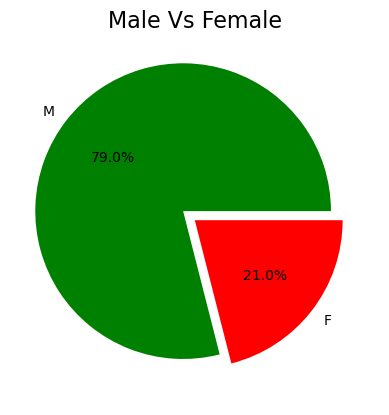

In [11]:
plt.pie(x=sex,labels=["M","F"],colors=["g","r"],explode=[0.1,0],autopct='%1.1f%%')
plt.title('Male Vs Female',fontsize=16)
plt.show()

In [19]:
ChestPainType = df['ChestPainType'].value_counts().reset_index()
ChestPainType

,ChestPainType,count
0,ASY,496
1,NAP,203
2,ATA,173
3,TA,46


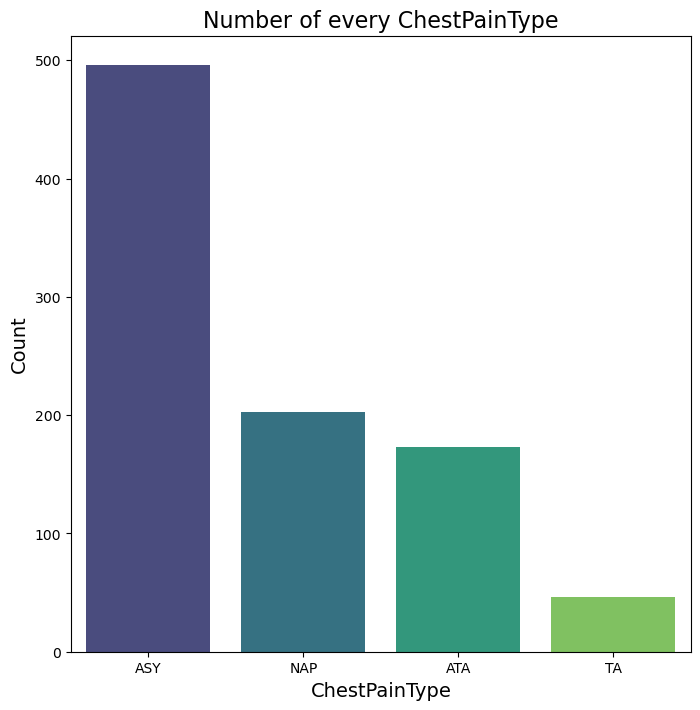

In [20]:
plt.figure(figsize=(8, 8))
sns.barplot(x='ChestPainType', y='count', data=ChestPainType, palette='viridis')
plt.xlabel('ChestPainType', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of every ChestPainType', fontsize=16)
plt.show()

In [17]:
RestingECG = df['RestingECG'].value_counts().reset_index()
RestingECG

,RestingECG,count
0,Normal,552
1,LVH,188
2,ST,178


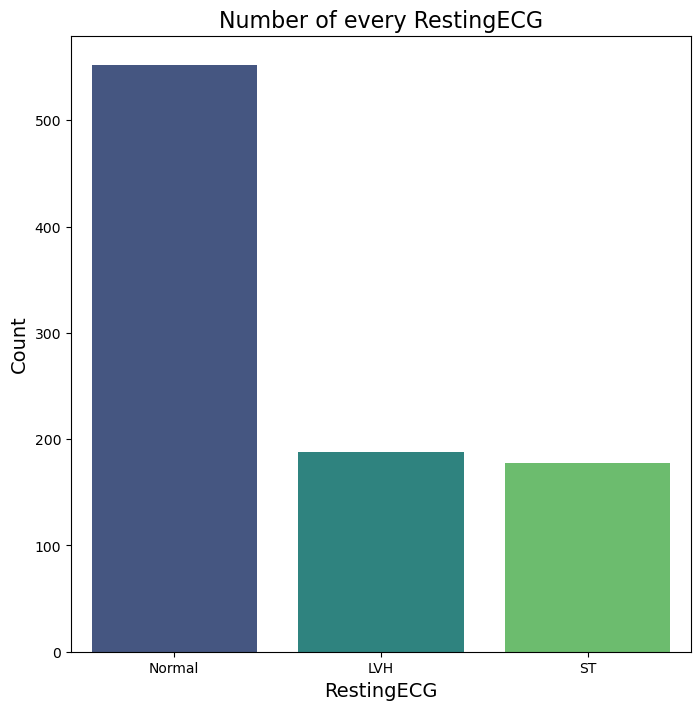

In [18]:
plt.figure(figsize=(8, 8))
sns.barplot(x='RestingECG', y='count', data=RestingECG, palette='viridis')
plt.xlabel('RestingECG', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of every RestingECG', fontsize=16)
plt.show()

In [21]:
ST_Slope = df['ST_Slope'].value_counts().reset_index()
ST_Slope

,ST_Slope,count
0,Flat,460
1,Up,395
2,Down,63


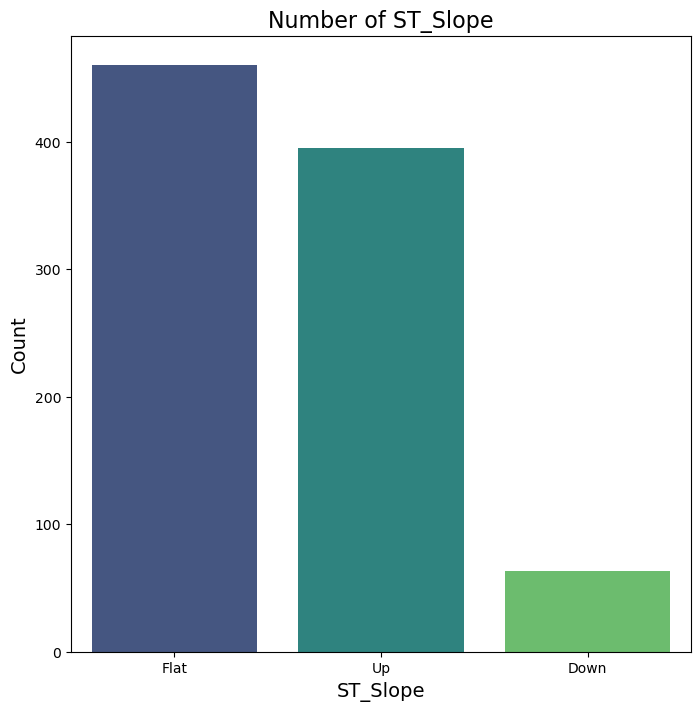

In [22]:
plt.figure(figsize=(8, 8))
sns.barplot(x='ST_Slope', y='count', data=ST_Slope, palette='viridis')
plt.xlabel('ST_Slope', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of ST_Slope', fontsize=16)
plt.show()

## Preprocessing Data

In [23]:
le = LabelEncoder()

# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [24]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


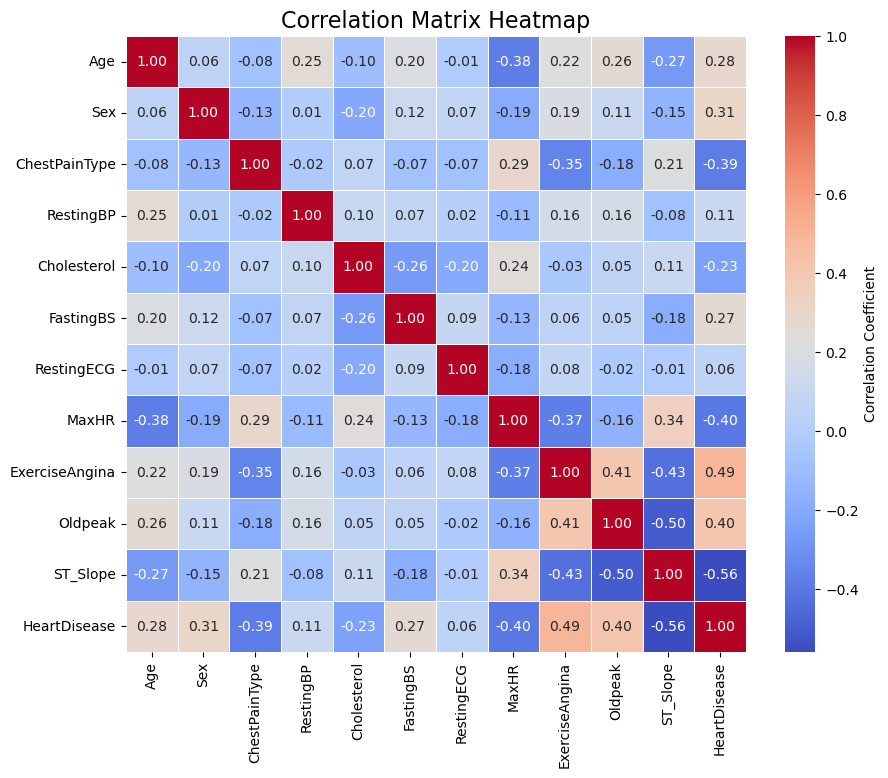

In [25]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.show()

## Train Test Split

In [26]:
X = df.drop(columns='HeartDisease', axis=1)
y = df['HeartDisease']

In [27]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [28]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [33]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,2,120,240,1,1,194,0,0.8,0
25,36,1,2,130,209,0,1,178,0,0.0,2
84,56,1,0,150,213,1,1,125,1,1.0,1
10,37,0,2,130,211,0,1,142,0,0.0,2
344,51,1,0,120,0,1,1,104,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,48,0,0,120,254,0,2,110,0,0.0,2
270,45,1,0,120,225,0,1,140,0,0.0,2
860,60,1,0,130,253,0,1,144,1,1.4,2
435,60,1,0,152,0,0,2,118,1,0.0,2


In [35]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
668,63,0,1,140,195,0,1,179,0,0.0,2
30,53,1,2,145,518,0,1,130,0,0.0,1
377,65,1,0,160,0,1,2,122,0,1.2,1
535,56,1,0,130,0,0,0,122,1,1.0,1
807,54,1,1,108,309,0,1,156,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
211,50,0,2,140,288,0,1,140,1,0.0,1
745,63,0,0,108,269,0,1,169,1,1.8,1
584,64,1,0,141,244,1,2,116,1,1.5,1
878,49,1,1,130,266,0,1,171,0,0.6,2


## Building Model

### XGBRegressor

In [31]:
XGB = XGBClassifier()

In [36]:
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
XGB.score(X_test,y_test)

0.8695652173913043

In [40]:
y_pred = XGB.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        77
           1       0.92      0.85      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



Accuracy:0.88


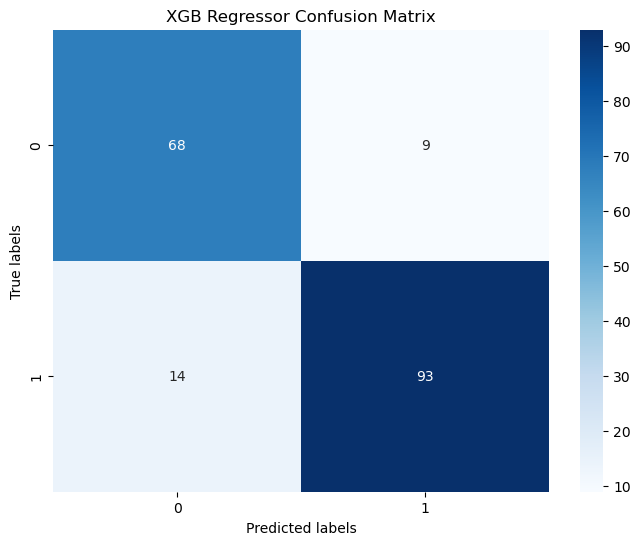

In [76]:
accuracy = accuracy_score(y_test,y_pred)
cm4 = confusion_matrix(y_test, y_pred) 
print(f"Accuracy:{accuracy:.2f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('XGB Regressor Confusion Matrix')
plt.show()

### RandomForestClassifier

In [90]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred) 

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        77
           1       0.92      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



Accuracy:0.88


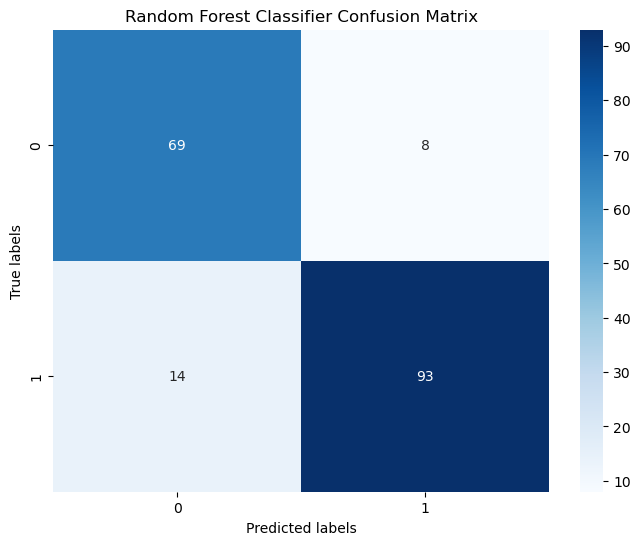

In [92]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

### SVM(SVC)

In [81]:
svc = SVC() 
svc.fit(X_train, y_train)
svc.score(X_test,y_test)
cm3 = confusion_matrix(y_test, y_pred)

In [82]:
y_pred = RFC.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        77
           1       0.93      0.89      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.90      0.90       184



Accuracy:0.90


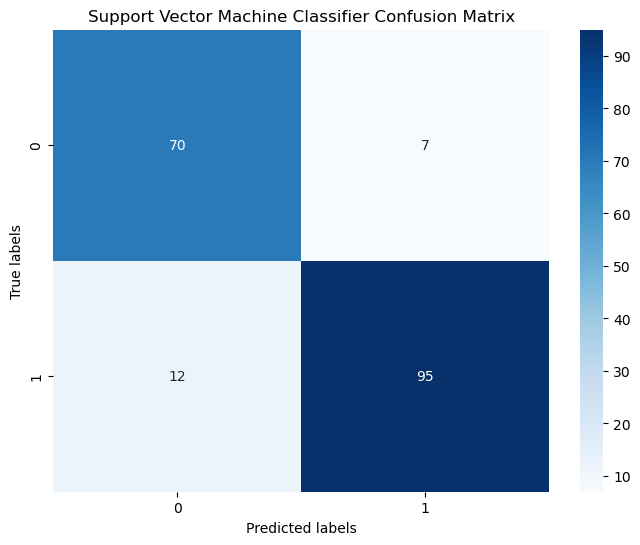

In [85]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Support Vector Machine Classifier Confusion Matrix')
plt.show()

### DescionTreeClassifier

In [86]:
Df = DecisionTreeClassifier()
Df.fit(X_train,y_train)
y_pred = Df.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77        77
           1       0.87      0.76      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.81      0.79      0.79       184



Accuracy:0.79


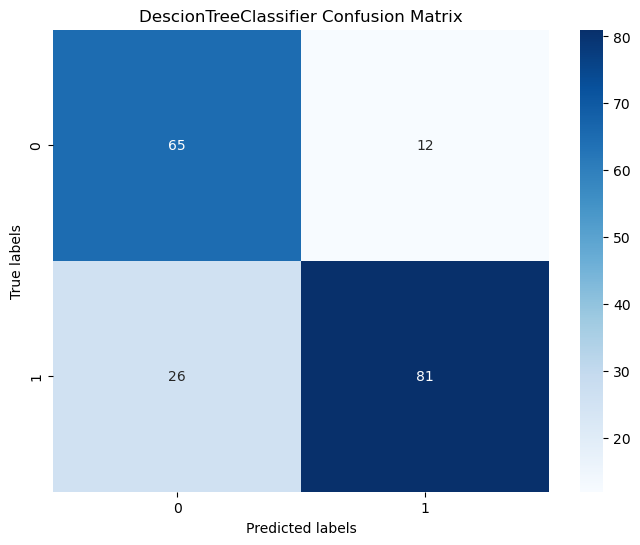

In [89]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('DescionTreeClassifier Confusion Matrix')
plt.show()